In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import collections
import gzip
import numpy as np
import os
import phate
import time

import pandas as pd
import pickle as pk

from collections import defaultdict
import itertools

# Interactive HTML tools
from ipywidgets import interact
import bokeh
import bokeh.io
from bokeh.io import push_notebook
from bokeh.plotting import figure, show, save, output_notebook, output_file
from bokeh.palettes import Category20b
from bokeh.palettes import Category20
from bokeh.palettes import Category10
from bokeh.palettes import PRGn
from bokeh.palettes import Set1

# Machine-learning and dimensionality reduction tools
import sklearn
from sklearn import decomposition
from sklearn.decomposition import PCA as PCA # We'll use this to check our implementation
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import MDS

In [2]:
from sklearn.manifold import TSNE_custom

In [3]:
from MulticoreTSNE import MulticoreTSNE as mTSNE

In [4]:
import umap

# Genizon for Luke

In [11]:
data_dir = '/Volumes/Stockage/alex/Genizon'
pc_file = 'Genizon_AllSamples_PCA.eigenvec'

pc_path = os.path.join(data_dir, pc_file)

# Import PC data. This data must be converted to an array.
with open(pc_path) as pc:
    pca_contents = pc.readlines()

pca_data = []

for pc in pca_contents:
    pca_data.append(pc.split()[2:len(pc)])

pca_data_array = np.array(pca_data).astype(np.float)

In [12]:
pca_data_array.shape

(9961, 20)

In [13]:
proj_dir = '/Volumes/Stockage/alex/Genizon/projections'

tstamp_log = ''.join([str(t) for t in time.gmtime()[0:6]])
nn_vals = [5,10,15,50]
md_vals = [0.001, 0.01, 0.1, 0.5]
pc_vals = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

for pc in pc_vals:
    for nn in nn_vals:
        for md in md_vals:
            proj = umap.UMAP(n_components=2, n_neighbors=nn, min_dist=md).fit_transform(pca_data_array[:,:pc])
            fname = 'GENIZON_UMAP_PC'+str(pc)+'_NN'+str(nn)+'_MD'+str(md)+'_'+tstamp_log
            np.savetxt(os.path.join(proj_dir, fname), proj)

KeyboardInterrupt: 

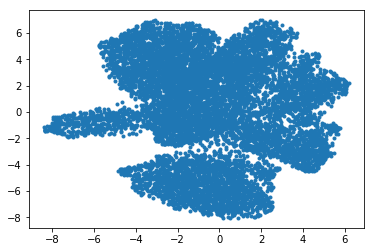

In [31]:
fname = 'GENIZON_UMAP_PC10_NN15_MD0.5_201843018199'

temp_proj = np.loadtxt(os.path.join(proj_dir, fname))

plt.plot(temp_proj[:,0],temp_proj[:,1],'.')

# 1000G data with fixed seed

In [10]:
# Import values from 1000G workbook 
%store -r continents
%store -r pop_by_continent
%store -r pop
%store -r indices_of_population_members
%store -r name_by_code
%store -r continent_by_population
%store -r individuals
%store -r population_by_individual
%store -r individuals_by_population
%store -r populations
%store -r color_dict

In [11]:
%store -r transposed_genotype_matrix

pca_full = PCA().fit(transposed_genotype_matrix)

In [14]:
pca_full.components_.shape[1]

86864

In [28]:
# Store ever tenth iteration with a fixed point
storage_dir = '/Volumes/Stockage/alex/1000G/iterations'
pc_list = [i for i in range(2,50)]# + [i for i in range(20,51,5)]

for pc in pc_list:
    comps = pca_full.components_[:pc,:]
    projections_to_PCs = np.dot((transposed_genotype_matrix - pca_full.mean_), comps.T)
    
    tsne_proj = TSNE(n_components=2, verbose=3, random_state=1).fit_transform(projections_to_PCs)
    
    np.savetxt(os.path.join(storage_dir,str(pc).zfill(2)),tsne_proj)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3450 samples in 0.001s...
[t-SNE] Computed neighbors for 3450 samples in 0.036s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3450
[t-SNE] Computed conditional probabilities for sample 2000 / 3450
[t-SNE] Computed conditional probabilities for sample 3000 / 3450
[t-SNE] Computed conditional probabilities for sample 3450 / 3450
[t-SNE] Mean sigma: 0.391980
[t-SNE] Computed conditional probabilities in 0.088s
[t-SNE] Iteration 50: error = 73.5225525, gradient norm = 0.0475877 (50 iterations in 3.294s)
[t-SNE] Iteration 100: error = 62.9376984, gradient norm = 0.0183555 (50 iterations in 2.604s)
[t-SNE] Iteration 150: error = 60.3480530, gradient norm = 0.0122277 (50 iterations in 2.457s)
[t-SNE] Iteration 200: error = 59.1011734, gradient norm = 0.0088108 (50 iterations in 2.449s)
[t-SNE] Iteration 250: error = 58.3405952, gradient norm = 0.0093892 (50 iterations in 2.464s)
[t-SNE] KL divergence after 250 iterati

[t-SNE] Iteration 200: error = 59.1479492, gradient norm = 0.0099082 (50 iterations in 2.512s)
[t-SNE] Iteration 250: error = 58.4616890, gradient norm = 0.0084526 (50 iterations in 2.332s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.461689
[t-SNE] Iteration 300: error = 1.3227496, gradient norm = 0.0011225 (50 iterations in 2.539s)
[t-SNE] Iteration 350: error = 1.0075876, gradient norm = 0.0004276 (50 iterations in 2.644s)
[t-SNE] Iteration 400: error = 0.8835937, gradient norm = 0.0002500 (50 iterations in 2.612s)
[t-SNE] Iteration 450: error = 0.8206481, gradient norm = 0.0001844 (50 iterations in 2.593s)
[t-SNE] Iteration 500: error = 0.7864810, gradient norm = 0.0001489 (50 iterations in 2.597s)
[t-SNE] Iteration 550: error = 0.7666804, gradient norm = 0.0001298 (50 iterations in 2.600s)
[t-SNE] Iteration 600: error = 0.7539644, gradient norm = 0.0001191 (50 iterations in 2.598s)
[t-SNE] Iteration 650: error = 0.7452162, gradient norm = 0.0001077 (50 it

[t-SNE] Iteration 550: error = 0.7529510, gradient norm = 0.0001379 (50 iterations in 2.679s)
[t-SNE] Iteration 600: error = 0.7412755, gradient norm = 0.0001252 (50 iterations in 2.744s)
[t-SNE] Iteration 650: error = 0.7327899, gradient norm = 0.0001186 (50 iterations in 2.694s)
[t-SNE] Iteration 700: error = 0.7263613, gradient norm = 0.0001124 (50 iterations in 2.701s)
[t-SNE] Iteration 750: error = 0.7207277, gradient norm = 0.0001078 (50 iterations in 2.668s)
[t-SNE] Iteration 800: error = 0.7161691, gradient norm = 0.0000955 (50 iterations in 2.619s)
[t-SNE] Iteration 850: error = 0.7118413, gradient norm = 0.0000929 (50 iterations in 2.561s)
[t-SNE] Iteration 900: error = 0.7076909, gradient norm = 0.0000899 (50 iterations in 2.641s)
[t-SNE] Iteration 950: error = 0.7041150, gradient norm = 0.0000880 (50 iterations in 2.539s)
[t-SNE] Iteration 1000: error = 0.7010613, gradient norm = 0.0000991 (50 iterations in 2.544s)
[t-SNE] Error after 1000 iterations: 0.701061
[t-SNE] Compu

[t-SNE] Iteration 950: error = 0.6490058, gradient norm = 0.0000852 (50 iterations in 2.599s)
[t-SNE] Iteration 1000: error = 0.6460459, gradient norm = 0.0000786 (50 iterations in 2.578s)
[t-SNE] Error after 1000 iterations: 0.646046
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3450 samples in 0.002s...
[t-SNE] Computed neighbors for 3450 samples in 0.093s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3450
[t-SNE] Computed conditional probabilities for sample 2000 / 3450
[t-SNE] Computed conditional probabilities for sample 3000 / 3450
[t-SNE] Computed conditional probabilities for sample 3450 / 3450
[t-SNE] Mean sigma: 2.703332
[t-SNE] Computed conditional probabilities in 0.092s
[t-SNE] Iteration 50: error = 74.3129959, gradient norm = 0.0659188 (50 iterations in 3.528s)
[t-SNE] Iteration 100: error = 61.7647018, gradient norm = 0.0277794 (50 iterations in 2.528s)
[t-SNE] Iteration 150: error = 58.8040848, gradient norm = 0.0167553 (50 iterations in 2.

[t-SNE] Iteration 50: error = 74.2029572, gradient norm = 0.0630584 (50 iterations in 3.623s)
[t-SNE] Iteration 100: error = 61.3280067, gradient norm = 0.0285648 (50 iterations in 2.743s)
[t-SNE] Iteration 150: error = 58.4038849, gradient norm = 0.0178174 (50 iterations in 2.484s)
[t-SNE] Iteration 200: error = 57.0685005, gradient norm = 0.0163803 (50 iterations in 2.470s)
[t-SNE] Iteration 250: error = 56.2588921, gradient norm = 0.0170249 (50 iterations in 2.407s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.258892
[t-SNE] Iteration 300: error = 1.2910784, gradient norm = 0.0011177 (50 iterations in 2.591s)
[t-SNE] Iteration 350: error = 0.9814227, gradient norm = 0.0004292 (50 iterations in 2.698s)
[t-SNE] Iteration 400: error = 0.8595857, gradient norm = 0.0002566 (50 iterations in 2.645s)
[t-SNE] Iteration 450: error = 0.7987397, gradient norm = 0.0001865 (50 iterations in 2.680s)
[t-SNE] Iteration 500: error = 0.7649862, gradient norm = 0.0001564 (50 

[t-SNE] Iteration 400: error = 0.8910016, gradient norm = 0.0002654 (50 iterations in 2.685s)
[t-SNE] Iteration 450: error = 0.8287245, gradient norm = 0.0001989 (50 iterations in 2.685s)
[t-SNE] Iteration 500: error = 0.7936785, gradient norm = 0.0001637 (50 iterations in 2.752s)
[t-SNE] Iteration 550: error = 0.7729075, gradient norm = 0.0001400 (50 iterations in 2.898s)
[t-SNE] Iteration 600: error = 0.7589135, gradient norm = 0.0001307 (50 iterations in 2.880s)
[t-SNE] Iteration 650: error = 0.7492852, gradient norm = 0.0001193 (50 iterations in 2.787s)
[t-SNE] Iteration 700: error = 0.7414574, gradient norm = 0.0001111 (50 iterations in 2.697s)
[t-SNE] Iteration 750: error = 0.7350124, gradient norm = 0.0000991 (50 iterations in 2.670s)
[t-SNE] Iteration 800: error = 0.7296447, gradient norm = 0.0001058 (50 iterations in 2.683s)
[t-SNE] Iteration 850: error = 0.7252146, gradient norm = 0.0000970 (50 iterations in 2.657s)
[t-SNE] Iteration 900: error = 0.7212129, gradient norm = 0.

[t-SNE] Iteration 800: error = 0.7404217, gradient norm = 0.0000955 (50 iterations in 2.641s)
[t-SNE] Iteration 850: error = 0.7355732, gradient norm = 0.0000921 (50 iterations in 2.638s)
[t-SNE] Iteration 900: error = 0.7310946, gradient norm = 0.0000867 (50 iterations in 2.622s)
[t-SNE] Iteration 950: error = 0.7270569, gradient norm = 0.0000871 (50 iterations in 2.630s)
[t-SNE] Iteration 1000: error = 0.7238068, gradient norm = 0.0000856 (50 iterations in 2.626s)
[t-SNE] Error after 1000 iterations: 0.723807
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3450 samples in 0.002s...
[t-SNE] Computed neighbors for 3450 samples in 0.154s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3450
[t-SNE] Computed conditional probabilities for sample 2000 / 3450
[t-SNE] Computed conditional probabilities for sample 3000 / 3450
[t-SNE] Computed conditional probabilities for sample 3450 / 3450
[t-SNE] Mean sigma: 4.038185
[t-SNE] Computed conditional probabilities in 0.0

[t-SNE] Iteration 50: error = 75.2698059, gradient norm = 0.0851933 (50 iterations in 4.076s)
[t-SNE] Iteration 100: error = 61.7148361, gradient norm = 0.0288568 (50 iterations in 2.648s)
[t-SNE] Iteration 150: error = 58.7981758, gradient norm = 0.0206261 (50 iterations in 2.583s)
[t-SNE] Iteration 200: error = 57.4445648, gradient norm = 0.0160942 (50 iterations in 2.605s)
[t-SNE] Iteration 250: error = 56.6599388, gradient norm = 0.0106631 (50 iterations in 2.534s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.659939
[t-SNE] Iteration 300: error = 1.3704100, gradient norm = 0.0011384 (50 iterations in 2.687s)
[t-SNE] Iteration 350: error = 1.0636597, gradient norm = 0.0004410 (50 iterations in 2.748s)
[t-SNE] Iteration 400: error = 0.9391515, gradient norm = 0.0002887 (50 iterations in 2.728s)
[t-SNE] Iteration 450: error = 0.8768442, gradient norm = 0.0001999 (50 iterations in 2.744s)
[t-SNE] Iteration 500: error = 0.8398266, gradient norm = 0.0001692 (50 

[t-SNE] Iteration 400: error = 0.9490552, gradient norm = 0.0002788 (50 iterations in 2.777s)
[t-SNE] Iteration 450: error = 0.8856910, gradient norm = 0.0002147 (50 iterations in 2.783s)
[t-SNE] Iteration 500: error = 0.8500558, gradient norm = 0.0001681 (50 iterations in 2.748s)
[t-SNE] Iteration 550: error = 0.8270851, gradient norm = 0.0001475 (50 iterations in 2.750s)
[t-SNE] Iteration 600: error = 0.8106479, gradient norm = 0.0001264 (50 iterations in 2.746s)
[t-SNE] Iteration 650: error = 0.7978984, gradient norm = 0.0001214 (50 iterations in 2.779s)
[t-SNE] Iteration 700: error = 0.7876773, gradient norm = 0.0001194 (50 iterations in 2.752s)
[t-SNE] Iteration 750: error = 0.7801803, gradient norm = 0.0001159 (50 iterations in 2.773s)
[t-SNE] Iteration 800: error = 0.7748540, gradient norm = 0.0001116 (50 iterations in 2.747s)
[t-SNE] Iteration 850: error = 0.7702771, gradient norm = 0.0001007 (50 iterations in 2.740s)
[t-SNE] Iteration 900: error = 0.7657656, gradient norm = 0.

[t-SNE] Iteration 800: error = 0.7832481, gradient norm = 0.0001120 (50 iterations in 2.735s)
[t-SNE] Iteration 850: error = 0.7776827, gradient norm = 0.0001040 (50 iterations in 2.791s)
[t-SNE] Iteration 900: error = 0.7729297, gradient norm = 0.0001077 (50 iterations in 2.780s)
[t-SNE] Iteration 950: error = 0.7687666, gradient norm = 0.0000897 (50 iterations in 2.779s)
[t-SNE] Iteration 1000: error = 0.7646447, gradient norm = 0.0000970 (50 iterations in 2.749s)
[t-SNE] Error after 1000 iterations: 0.764645
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3450 samples in 0.003s...
[t-SNE] Computed neighbors for 3450 samples in 0.216s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3450
[t-SNE] Computed conditional probabilities for sample 2000 / 3450
[t-SNE] Computed conditional probabilities for sample 3000 / 3450
[t-SNE] Computed conditional probabilities for sample 3450 / 3450
[t-SNE] Mean sigma: 4.960495
[t-SNE] Computed conditional probabilities in 0.1

[t-SNE] Iteration 50: error = 76.5614624, gradient norm = 0.0784026 (50 iterations in 4.251s)
[t-SNE] Iteration 100: error = 62.1524162, gradient norm = 0.0260040 (50 iterations in 2.741s)
[t-SNE] Iteration 150: error = 59.3687134, gradient norm = 0.0180726 (50 iterations in 2.561s)
[t-SNE] Iteration 200: error = 58.1347504, gradient norm = 0.0196076 (50 iterations in 2.546s)
[t-SNE] Iteration 250: error = 57.4094391, gradient norm = 0.0111758 (50 iterations in 2.524s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.409439
[t-SNE] Iteration 300: error = 1.4135298, gradient norm = 0.0011105 (50 iterations in 2.739s)
[t-SNE] Iteration 350: error = 1.1029763, gradient norm = 0.0004546 (50 iterations in 2.769s)
[t-SNE] Iteration 400: error = 0.9729591, gradient norm = 0.0002947 (50 iterations in 2.813s)
[t-SNE] Iteration 450: error = 0.9061055, gradient norm = 0.0002217 (50 iterations in 2.789s)
[t-SNE] Iteration 500: error = 0.8668475, gradient norm = 0.0001852 (50 

[t-SNE] Iteration 400: error = 0.9770809, gradient norm = 0.0003042 (50 iterations in 3.042s)
[t-SNE] Iteration 450: error = 0.9085513, gradient norm = 0.0002326 (50 iterations in 3.063s)
[t-SNE] Iteration 500: error = 0.8671668, gradient norm = 0.0001828 (50 iterations in 3.010s)
[t-SNE] Iteration 550: error = 0.8402972, gradient norm = 0.0001574 (50 iterations in 3.004s)
[t-SNE] Iteration 600: error = 0.8204641, gradient norm = 0.0001441 (50 iterations in 3.103s)
[t-SNE] Iteration 650: error = 0.8057321, gradient norm = 0.0001277 (50 iterations in 3.030s)
[t-SNE] Iteration 700: error = 0.7941699, gradient norm = 0.0001232 (50 iterations in 3.016s)
[t-SNE] Iteration 750: error = 0.7853959, gradient norm = 0.0001117 (50 iterations in 3.056s)
[t-SNE] Iteration 800: error = 0.7778537, gradient norm = 0.0001070 (50 iterations in 3.045s)
[t-SNE] Iteration 850: error = 0.7711613, gradient norm = 0.0000989 (50 iterations in 3.020s)
[t-SNE] Iteration 900: error = 0.7655066, gradient norm = 0.

[t-SNE] Iteration 800: error = 0.7896518, gradient norm = 0.0001068 (50 iterations in 3.054s)
[t-SNE] Iteration 850: error = 0.7830759, gradient norm = 0.0001042 (50 iterations in 3.015s)
[t-SNE] Iteration 900: error = 0.7771019, gradient norm = 0.0000930 (50 iterations in 3.020s)
[t-SNE] Iteration 950: error = 0.7715533, gradient norm = 0.0000909 (50 iterations in 3.016s)
[t-SNE] Iteration 1000: error = 0.7664309, gradient norm = 0.0000901 (50 iterations in 2.982s)
[t-SNE] Error after 1000 iterations: 0.766431
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3450 samples in 0.003s...
[t-SNE] Computed neighbors for 3450 samples in 0.293s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3450
[t-SNE] Computed conditional probabilities for sample 2000 / 3450
[t-SNE] Computed conditional probabilities for sample 3000 / 3450
[t-SNE] Computed conditional probabilities for sample 3450 / 3450
[t-SNE] Mean sigma: 5.464029
[t-SNE] Computed conditional probabilities in 0.1

[t-SNE] Iteration 50: error = 75.7864380, gradient norm = 0.1006001 (50 iterations in 4.356s)
[t-SNE] Iteration 100: error = 63.3646088, gradient norm = 0.0346929 (50 iterations in 3.047s)
[t-SNE] Iteration 150: error = 60.6022530, gradient norm = 0.0232958 (50 iterations in 2.863s)
[t-SNE] Iteration 200: error = 59.3856049, gradient norm = 0.0183071 (50 iterations in 2.812s)
[t-SNE] Iteration 250: error = 58.6777344, gradient norm = 0.0155249 (50 iterations in 2.802s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.677734
[t-SNE] Iteration 300: error = 1.4557879, gradient norm = 0.0011881 (50 iterations in 3.003s)
[t-SNE] Iteration 350: error = 1.1361359, gradient norm = 0.0004977 (50 iterations in 3.086s)
[t-SNE] Iteration 400: error = 1.0005935, gradient norm = 0.0003349 (50 iterations in 3.041s)
[t-SNE] Iteration 450: error = 0.9293342, gradient norm = 0.0002553 (50 iterations in 3.085s)
[t-SNE] Iteration 500: error = 0.8854395, gradient norm = 0.0002037 (50 

[t-SNE] Iteration 400: error = 0.9991807, gradient norm = 0.0003285 (50 iterations in 3.057s)
[t-SNE] Iteration 450: error = 0.9280047, gradient norm = 0.0002457 (50 iterations in 3.053s)
[t-SNE] Iteration 500: error = 0.8854284, gradient norm = 0.0001950 (50 iterations in 3.051s)
[t-SNE] Iteration 550: error = 0.8560243, gradient norm = 0.0001694 (50 iterations in 3.111s)
[t-SNE] Iteration 600: error = 0.8342892, gradient norm = 0.0001495 (50 iterations in 3.095s)
[t-SNE] Iteration 650: error = 0.8174831, gradient norm = 0.0001349 (50 iterations in 3.091s)
[t-SNE] Iteration 700: error = 0.8042337, gradient norm = 0.0001266 (50 iterations in 3.092s)
[t-SNE] Iteration 750: error = 0.7942560, gradient norm = 0.0001113 (50 iterations in 3.078s)
[t-SNE] Iteration 800: error = 0.7854857, gradient norm = 0.0001081 (50 iterations in 3.109s)
[t-SNE] Iteration 850: error = 0.7780178, gradient norm = 0.0000998 (50 iterations in 3.098s)
[t-SNE] Iteration 900: error = 0.7713808, gradient norm = 0.

In [33]:
for file in os.listdir(storage_dir):
    if os.path.isfile(os.path.join(storage_dir,file)):
        
        temp_proj = np.loadtxt(os.path.join(storage_dir,file))
        # Plot images for each of the projections.
        component_1_id = 0
        component_2_id = 1
        
        fig = plt.figure(figsize=(30,30))
        ax = fig.add_subplot(111, aspect=1)

        p = figure(plot_width=1500, plot_height=800)
        p.title.text = "test"
        
        print(file)

        for cont in continents: 
            for pop in pop_by_continent[cont]:
                projections_within_population = temp_proj[indices_of_population_members[pop]]
                p.circle(projections_within_population[:,component_1_id], projections_within_population[:,component_2_id], 
                         legend=name_by_code[pop], color = color_dict[pop])
                ax.set_title('Iteration: ' + file)
                ax.plot(projections_within_population[:,component_1_id], projections_within_population[:,component_2_id],
                        '.',color=color_dict[pop])

        p.legend.location = "top_left"

        p.legend.click_policy="hide"

        fig.savefig("/Volumes/Stockage/alex/1000G/iterations/Images/"+str(file).zfill(2)+".jpeg",format='jpeg')
        plt.close()
        
        output_file("/Volumes/Stockage/alex/1000G/iterations/HTML/"+str(file).zfill(2)+".html", title="test")

        save(p)

02
03
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [34]:
# Animate the images
import imageio

img_dir = '/Volumes/Stockage/alex/1000G/iterations/Images'
movie_dir = '/Volumes/Stockage/alex/1000G/iterations/Movies'
movie_name = '1000G_animation.gif'
    
images = []
for filename in os.listdir(img_dir):
    if os.path.isdir(os.path.join(img_dir,filename)):
        continue
        
    images.append(imageio.imread(os.path.join(img_dir,filename)))

imageio.mimsave(os.path.join(movie_dir,movie_name), images,duration=1)

# Testing time differences below

In [2]:
%store -r hrs_data_array

In [5]:
test_tsne_custom = TSNE_custom(n_components=2).fit_transform(pca_10)

In [5]:
t0 = time.time()
tsne_sklearn = TSNE(n_components=2).fit_transform(hrs_data_array[:,0:20])
t1 = time.time()

print('Time to complete Scikit-learn t-SNE: ' + str(t1-t0))

t2 = time.time()
tsne_mcore = mTSNE(n_components=2, n_jobs=4).fit_transform(hrs_data_array[:,0:20])
t3 = time.time()

print('Time to complete multicore t-SNE: ' + str(t3-t2))

Time to complete Scikit-learn t-SNE: 382.89354395866394
Time to complete multicore t-SNE: 124.2505190372467


In [6]:
t2 = time.time()
tsne_mcore2 = mTSNE(n_components=2, n_jobs=8).fit_transform(hrs_data_array[:,0:20])
t3 = time.time()

print('Time to complete multicore t-SNE (8 jobs): ' + str(t3-t2))

Time to complete multicore t-SNE (8 jobs): 137.14015793800354


In [30]:
temp_array = np.loadtxt('/Users/alex/Documents/Ethnicity/animation/test_dir/999')

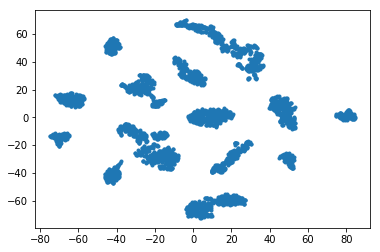

In [31]:
plt.plot(temp_array[:,0],temp_array[:,1],'.')

# Test UKBB+1000G

In [4]:
ukbb_1000g = np.loadtxt('/Volumes/Stockage/alex/ukbb_projections/ukbb_1000g_tsne_pc10_plex_iter_10000')

In [5]:
with open('/Users/alex/Documents/Ethnicity/Alex_UKBB_KGP') as contents:
    ukbb_1000g_aux = contents.readlines()

In [6]:
aux_data = []
for u in ukbb_1000g_aux[0:]:
    aux_data.append([u_.strip('\"\n') for u_ in u.split('\t')])

In [7]:
# Create data frames for management of ethnicity
aux_data_df = pd.DataFrame.from_records(aux_data[1:],columns=aux_data[0])
aux_data_df = aux_data_df[['FID','IID','Ethnicity','group']]
aux_data_df

,FID,IID,Ethnicity,group
0,1000011,1000011,British,WHITE
1,1000029,1000029,British,WHITE
2,1000032,1000032,British,WHITE
3,1000048,1000048,British,WHITE
4,1000057,1000057,British,WHITE
5,1000064,1000064,British,WHITE
6,1000073,1000073,Any other white Background,WHITE
7,1000080,1000080,British,WHITE
8,1000095,1000095,British,WHITE
9,1000102,1000102,British,WHITE


In [8]:
# Auxiliary data maps ethnicity to index.
aux_data_df.groupby(['Ethnicity','group']).count()

,,FID,IID
Ethnicity,group,,
ACB,AFR,102,102
ASW,AFR,104,104
African,BLACK,3205,3205
Any other Asian background,ASIAN,1747,1747
Any other Black background,BLACK,118,118
Any other Mixed background,MIXED,996,996
Any other white Background,WHITE,15760,15760
Asian or Asian British,ASIAN,42,42
Bangladeshi,ASIAN,221,221


In [9]:
# Use parent groupings in current data
ethnic_families = {}
#set(aux_data_df['Ethnicity'].values.tolist())

for item in aux_data_df[['Ethnicity','group']].drop_duplicates().values.tolist():
    try:
        ethnic_families[item[1]].append(item[0].strip())
    except KeyError:
        ethnic_families[item[1]] = [item[0]]
        
    #try: 
    #    pop_by_continent[split_line[2]].append(split_line[1])
    #except KeyError:
    #    pop_by_continent[split_line[2]] = [split_line[1]]

#for item in set(aux_data_df['Ethnicity'].values.tolist())

In [10]:
for key in ethnic_families.keys():
    print(key, len(ethnic_families[key]))

print()
print(len(ethnic_families.keys()))

WHITE 4
ASIAN 5
BLACK 4
OTHER 4
MIXED 5
CHINESE 1
EUR 5
EAS 5
AMR 4
AFR 5
SAS 2

11


In [11]:
ethnic_families

{'AFR': ['YRI', 'LWK', 'ASW', 'MKK', 'ACB'],
 'AMR': ['PUR', 'CLM', 'MXL', 'PEL'],
 'ASIAN': ['Pakistani',
  'Indian',
  'Any other Asian background',
  'Asian or Asian British',
  'Bangladeshi'],
 'BLACK': ['African',
  'Caribbean',
  'Any other Black background',
  'Black or Black Britsh'],
 'CHINESE': ['Chinese'],
 'EAS': ['CHS', 'CHB', 'CHD', 'JPT', 'CDX'],
 'EUR': ['GBR', 'FIN', 'IBS', 'CEU', 'TSI'],
 'MIXED': ['White and Black carribean',
  'White and  Black African',
  'White and Asian',
  'Any other Mixed background',
  'Mixed'],
 'OTHER': ['Other Ethnic group',
  'Prefer not to answer',
  'Do notknow',
  'No Ethnicity'],
 'SAS': ['GIH', 'KHV'],
 'WHITE': ['British', 'Any other white Background', 'Irish', 'White']}

In [12]:
# Find a colour family for each of these:
#WHITE 4 Category20c[4][-4:] (blue)
#ASIAN 5 BuPu[9][0:4] (purple)
#BLACK 4 Category20c[8][-4:] (orange)
#OTHER 4 Category20c[-4:] (gray)
#MIXED 5 BuGn[0:4] (green)
#CHINESE 1 Purples[9][5] (purple)
#EUR 5 PuRd[9][0:4] (red-pink)
#EAS (east asian) 5 Purples[9][0:4]
#AMR (Americas) 4 Category20b[12][-4:]
#AFR (Africa) 5 OrRd[9][0:4] (red-Orange)
#SAS 2 Category20b[20] Category20b[14][-2:]



In [13]:
from bokeh.palettes import Category20b, Category20c, BuPu, BuGn, Purples, PuRd, OrRd, Set1

In [14]:
color_dict = {}
for key in ethnic_families:
    if key == 'WHITE':
        color_dict[key]=Category20c[4][-4:]
    elif key == 'ASIAN':
        color_dict[key]=BuPu[9][0:5]
    elif key == 'BLACK':
        color_dict[key]=Category20c[8][-4:]
    elif key == 'OTHER':
        color_dict[key]=Category20c[20][-4:]
    elif key == 'MIXED':
        color_dict[key]=BuGn[9][-5:]
    elif key == 'CHINESE':
        color_dict[key]=[Purples[9][5]]
    elif key == 'EUR':
        color_dict[key]=PuRd[9][0:5]
    elif key == 'EAS':
        color_dict[key]=Purples[9][0:5]
    elif key == 'AMR':
        color_dict[key]=Category20b[12][-4:]
    elif key == 'AFR':
        color_dict[key]=OrRd[9][0:5]
    elif key == 'SAS':
        color_dict[key]=Category20b[14][-2:]
    
for key in ethnic_families:
    if len(ethnic_families[key])-len(color_dict[key])!=0:
        print(key)

In [15]:
color_dict

{'AFR': ['#7f0000', '#b30000', '#d7301f', '#ef6548', '#fc8d59'],
 'AMR': ['#8c6d31', '#bd9e39', '#e7ba52', '#e7cb94'],
 'ASIAN': ['#4d004b', '#810f7c', '#88419d', '#8c6bb1', '#8c96c6'],
 'BLACK': ['#e6550d', '#fd8d3c', '#fdae6b', '#fdd0a2'],
 'CHINESE': ['#bcbddc'],
 'EAS': ['#3f007d', '#54278f', '#6a51a3', '#807dba', '#9e9ac8'],
 'EUR': ['#67001f', '#980043', '#ce1256', '#e7298a', '#df65b0'],
 'MIXED': ['#66c2a4', '#99d8c9', '#ccece6', '#e5f5f9', '#f7fcfd'],
 'OTHER': ['#636363', '#969696', '#bdbdbd', '#d9d9d9'],
 'SAS': ['#843c39', '#ad494a'],
 'WHITE': ['#3182bd', '#6baed6', '#9ecae1', '#c6dbef']}

In [16]:
# Legend labels
label_dict = {'British':'British',
'Any other white Background':'Any other white Background',
'Pakistani':'Pakistani',
'African':'African',
'Irish':'Irish',
'Other Ethnic group':'Other Ethnic group',
'Caribbean':'Caribbean',
'Indian':'Indian',
'Prefer not to answer':'Prefer not to answer',
'Any other Asian background':'Any other Asian background',
'White':'White',
'White and Black carribean':'White and Black carribean',
'Asian or Asian British':'Asian or Asian British',
'Any other Black background':'Any other Black background',
'Do notknow':'Do not know',
'Chinese':'Chinese (UKBB)',
'White and  Black African':'White and Black',
'White and Asian':'White and Asian',
'Any other Mixed background':'Any Other Mixed',
'No Ethnicity':'No Ethnicity',
'Bangladeshi':'Bangladeshi (UKBB)',
'Black or Black Britsh':'Black or Black British',
'Mixed':'Mixed',
'CDX':'Chinese Dai in Xishuangbanna, China',
'CHB':'Han Chinese in Bejing, China',
'JPT':'Japanese in Tokyo, Japan',
'KHV':'Kinh in Ho Chi Minh City, Vietnam',
'CHS':'Southern Han Chinese, China',
'BEB':'Bengali in Bangladesh',
'GIH':'Gujarati Indian in Houston,TX',
'ITU':'Indian Telugu in the UK',
'PJL':'Punjabi in Lahore,Pakistan',
'STU':'Sri Lankan Tamil in the UK',
'ASW':'African Ancestry in Southwest US',
'ACB':'African Caribbean in Barbados',
'ESN':'Esan in Nigeria',
'GWD':'Gambian in Western Division',
'LWK':'Luhya in Webuye, Kenya',
'MSL':'Mende in Sierra Leone',
'YRI':'Yoruba in Ibadan, Nigeria',
'GBR':'British in England and Scotland',
'FIN':'Finnish in Finland',
'IBS':'Iberian populations in Spain',
'TSI':'Toscani in Italy',
'CEU':'Utah residents with N and W European ancestry',
'CLM':'Colombian in Medellin, Colombia',
'MXL':'Mexican Ancestry in LA, California',
'PEL':'Peruvian in Lima, Peru',
'PUR':'Puerto Rican in Puerto Rico',
'CHD':'CHD',
'MKK':'MKK'}

In [17]:
marker_dict_text = {'British':'BRI',
'Any other white Background':'AOW',
'Pakistani':'PKS',
'African':'AFR',
'Irish':'IRE',
'Other Ethnic group':'OEG',
'Caribbean':'CAR',
'Indian':'IND_UKBB',
'Prefer not to answer':'PNA',
'Any other Asian background':'AOA',
'White':'WHI',
'White and Black carribean':'WAB',
'Asian or Asian British':'AAB',
'Any other Black background':'AOB',
'Do notknow':'DNK',
'Chinese':'CHI_U',
'White and  Black African':'WAB',
'White and Asian':'WAA',
'Any other Mixed background':'AOM',
'No Ethnicity':'NE',
'Bangladeshi':'BGL',
'Black or Black Britsh':'BBB',
'Mixed':'MIX',
'CDX':'CDX',
'CHB':'CHB',
'JPT':'JPT',
'KHV':'KHV',
'CHS':'CHS',
'BEB':'BEB',
'GIH':'GIH',
'ITU':'ITU',
'PJL':'PJL',
'STU':'STU',
'ASW':'ASW',
'ACB':'ACB',
'ESN':'ESN',
'GWD':'GWD',
'LWK':'LWK',
'MSL':'MSL',
'YRI':'YRI',
'GBR':'GBR',
'FIN':'FIN',
'IBS':'IBS',
'TSI':'TSI',
'CEU':'CEU',
'CLM':'CLM',
'MXL':'MXL',
'PEL':'PEL',
'PUR':'PUR',
'CHD':'CHD',
'MKK':'MKK'}

In [18]:
# Dictionaries, populations, and colours have been defined
# Now need to get the indices of each population
indices_of_population = defaultdict(list)
ethnicity_list = aux_data_df['Ethnicity'].values.tolist()

for a in range(0, len(ethnicity_list)):
    try:
        indices_of_population[ethnicity_list[a]].append(a)
    except KeyError:
        print('missing individual')

In [26]:
fig = plt.figure(figsize=(100,100))
ax = fig.add_subplot(111, aspect=1)

for fam in ethnic_families.keys():
    cc = 0 # Colouring count
    for eth in ethnic_families[fam]:
        if eth=='Irish':
            temp_colour=Set1[6][-1]
        else:
            temp_colour=color_dict[fam][cc]
            
        temp_proj = ukbb_1000g[indices_of_population[eth]]
        ax.scatter(temp_proj[:,0],temp_proj[:,1],label=label_dict[eth],color=temp_colour,s=20,alpha=0)
        cc+=1
        
        print(eth)
        
        # Note: Generate geographic plots annotated with truncated Northing/Easting values.
        for i in range(0, temp_proj.shape[0]):
            ax.annotate(marker_dict_text[eth], xy=temp_proj[i], color=temp_colour, alpha=1,
                       fontsize=10)
        #ax.annotate(marker_dict[eth])

ax.legend(ncol=5,loc='lower center', bbox_to_anchor=(0.4,-0.12), fontsize=40,markerscale=25)

fig.savefig('test.jpeg',format='jpeg')
plt.close()

British
Any other white Background
Irish
White
Pakistani
Indian
Any other Asian background
Asian or Asian British
Bangladeshi
African
Caribbean
Any other Black background
Black or Black Britsh
Other Ethnic group
Prefer not to answer
Do notknow
No Ethnicity
White and Black carribean
White and  Black African
White and Asian
Any other Mixed background
Mixed
Chinese
GBR
FIN
IBS
CEU
TSI
CHS
CHB
CHD
JPT
CDX
PUR
CLM
MXL
PEL
YRI
LWK
ASW
MKK
ACB
GIH
KHV


In [247]:
# Create a legible label ()
# Create a legible
for key in ethnic_families.keys():
    print(ethnic_families[key])
    
# Translate the 1000G codes to text

['British', 'Any other white Background', 'Irish', 'White']
['Pakistani', 'Indian', 'Any other Asian background', 'Asian or Asian British', 'Bangladeshi']
['African', 'Caribbean', 'Any other Black background', 'Black or Black Britsh']
['Other Ethnic group', 'Prefer not to answer', 'Do notknow', 'No Ethnicity']
['White and Black carribean', 'White and  Black African', 'White and Asian', 'Any other Mixed background', 'Mixed']
['Chinese']
['GBR', 'FIN', 'IBS', 'CEU', 'TSI']
['CHS', 'CHB', 'CHD', 'JPT', 'CDX']
['PUR', 'CLM', 'MXL', 'PEL']
['YRI', 'LWK', 'ASW', 'MKK', 'ACB']
['GIH', 'KHV']
